In [2]:
%matplotlib ipympl

from onix.analysis.fitter import Fitter
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [15]:
def exp_decay(t, a, tau, c):
    return a * np.exp(-t / tau) + c

In [27]:
times = [
    datetime.datetime(2023, 11, 23, 17, 52).timestamp(),
    datetime.datetime(2023, 11, 24, 15, 53).timestamp(),
    datetime.datetime(2023, 11, 25, 21, 27).timestamp(),
    datetime.datetime(2023, 11, 27, 15, 33).timestamp(),
    datetime.datetime(2023, 11, 27, 18, 20).timestamp(),
]
times = [(time - times[0]) / 3600 for time in times]
freqs = [
    516.847042 - 0.0015,
    516.845863,
    516.846130,
    516.847975 - 0.0015,
    516.847997 - 0.0015,
]

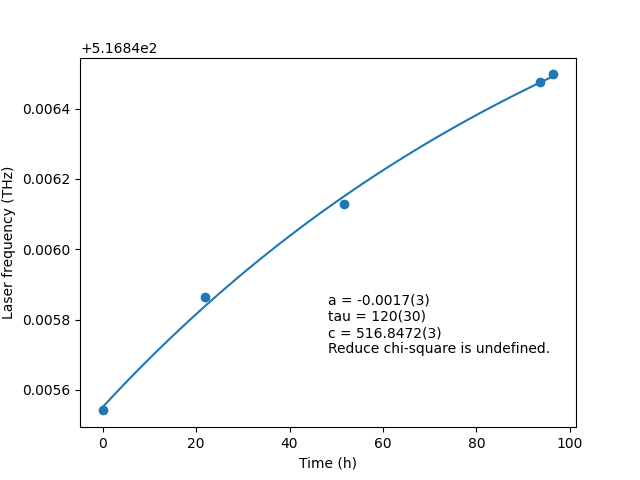

In [30]:
fitter = Fitter(exp_decay)
fitter.set_data(times, freqs)
fitter.set_p0({"tau": 100, "c": 516})
fitter.set_absolute_sigma(False)
fitter.fit()

times_plt = np.linspace(min(times), max(times), 1000)
fig, ax = plt.subplots()
ax.scatter(times, freqs)
ax.plot(times_plt, fitter.fitted_value(times_plt))
ax.text(0.5, 0.2, fitter.all_results_str(), transform=ax.transAxes)
ax.set_xlabel("Time (h)")
ax.set_ylabel("Laser frequency (THz)")
plt.show()